## 차원 축소, 특성 추출, 매니폴드 학습(Dimensionality Reduction, Characterization Extraction, Manifold Learning)
* 비지도 학습을 사용해 데이터를 변환하는 이유는 여러가지입니다. 가장 일반적인 동기는 시각화하거나, 데이터를 압축하거나, 추가적인 처리를 위해 정보가 더 잘 드러나는 표현을 찾기 위해서입니다.
* 이번 절에서는 이런 용도로 가장 간단하고 흔히 사용하는 알고리즘인 주성분 분석(principal component analysis, PCA)을 소개합니다. 그리고 특성 추출에 널리 사용하는 비음수 행렬 분해(non-negative matrix factorization, NMF)와 2차원 산점도를 이용해 시각화 용도로 많이 사용하는 t-SNE(t-distributed stochastic neighbor embedding)알고리즘도 살펴보겠습니다.
### 주성분 분석(PCA)
* 주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술입니다. 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택됩니다. 다음 예제는 인위적으로 만든 2차원 데이터셋을 사용하여 PCA 효과를 나타낸 것입니다.

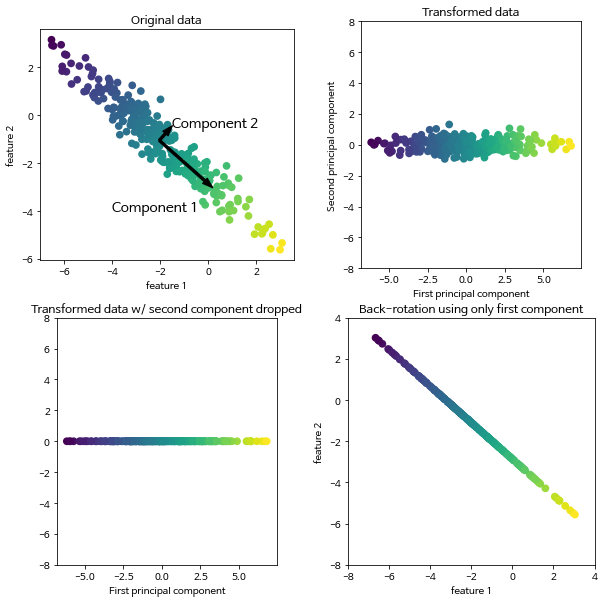

In [1]:
import mglearn
mglearn.plots.plot_pca_illustration()

[PCA(Principay Component Analysis)를 이용한 데이터 변환(Data Conversion by using PCA)]

### PCA를 적용해 유방암 데이터셋 시각화하기

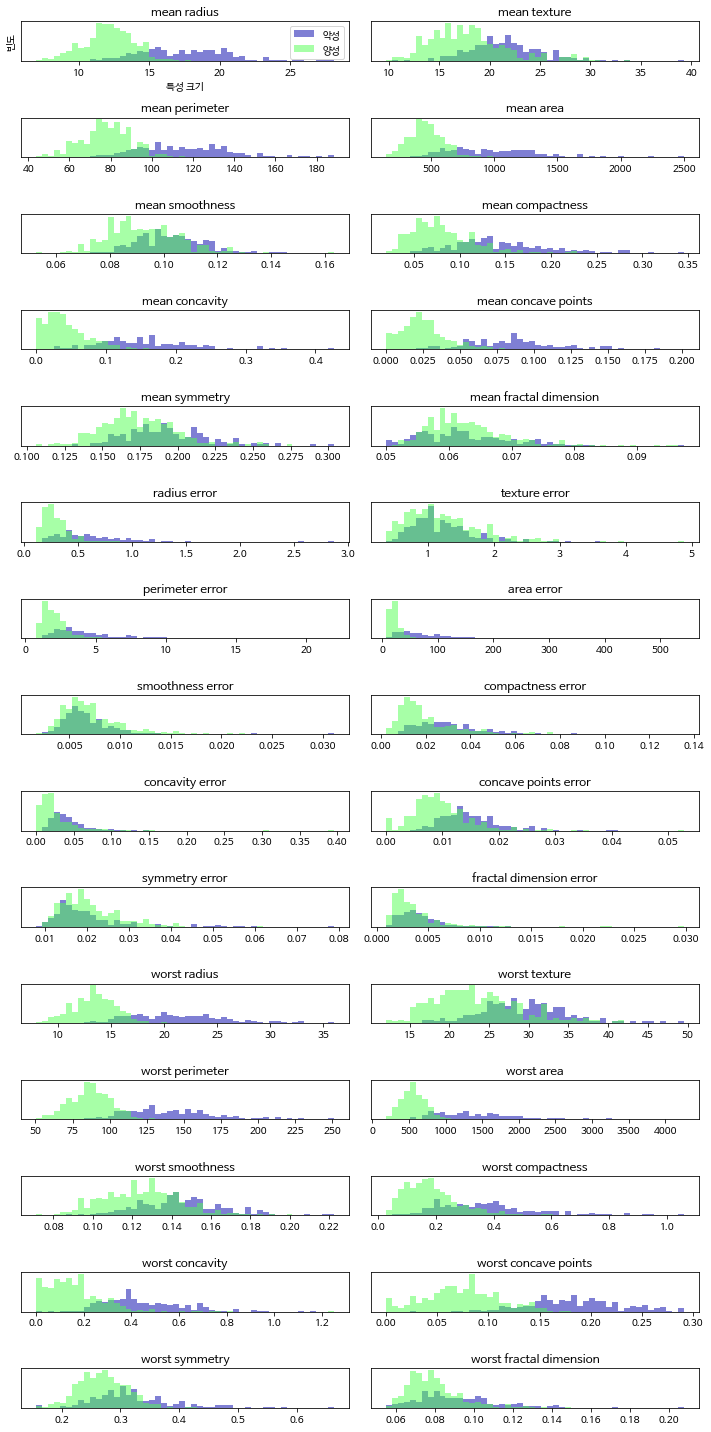

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc="best")
fig.tight_layout()

* PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정합니다.

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태:", str(X_scaled.shape))
print("축소된 데이터 형태:", str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

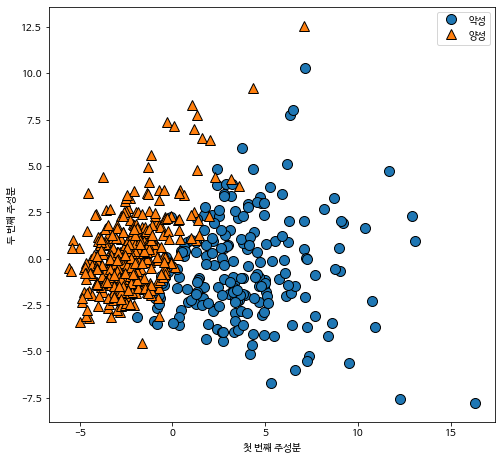

In [13]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성", "양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

[처음 두 개의 주성분을 사용해 그린 유방암 데이터셋의 2차원 선점도]

In [14]:
print("PCA 주성분 형태:", pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [15]:
print("PCA 주성분 형태:", pca.components_)

PCA 주성분 형태: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

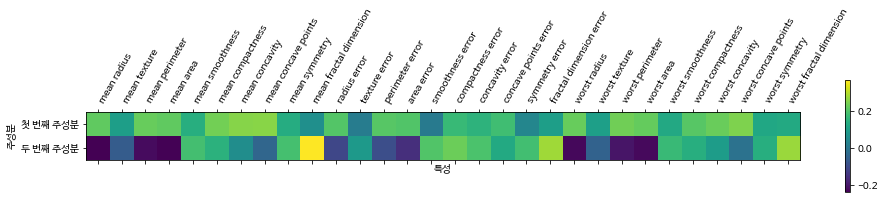

In [18]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

[유방암 데이터셋에서 찾은 처음 두 개의 주성분 히트맵]